In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,5,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,4e077235-7c17-4054-9997-7a890336a214,NaN,NaN,NaN,NaN,California
freq,NaN,7456,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


In [6]:
df.isnull().sum()

,0
week,0
sales_method,0
customer_id,0
nb_sold,0
revenue,1074
years_as_customer,0
nb_site_visits,0
state,0


In [7]:
df.dropna(subset=['revenue'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


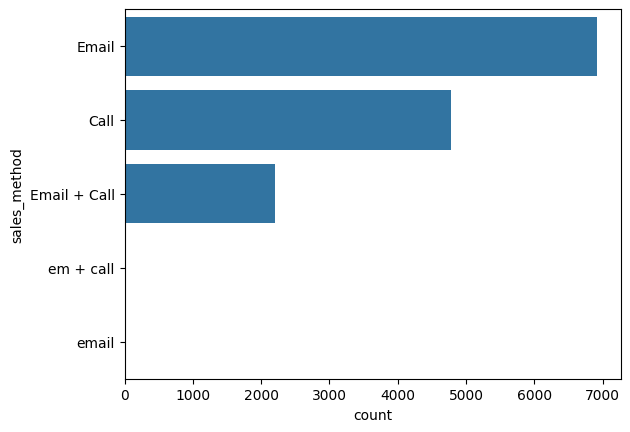

In [8]:
sns.countplot(data=df,y='sales_method',order=df['sales_method'].value_counts().index)
plt.show()

In [9]:
df['sales_method'] = df['sales_method'].astype(str).str.strip().str.capitalize()
df['sales_method'] = df['sales_method'].replace({'Em + call':'Email + call'})
print(df['sales_method'].value_counts())


sales_method
Email           6922
Call            4781
Email + call    2223
Name: count, dtype: int64


Checking data after cleaning

In [10]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


EDA

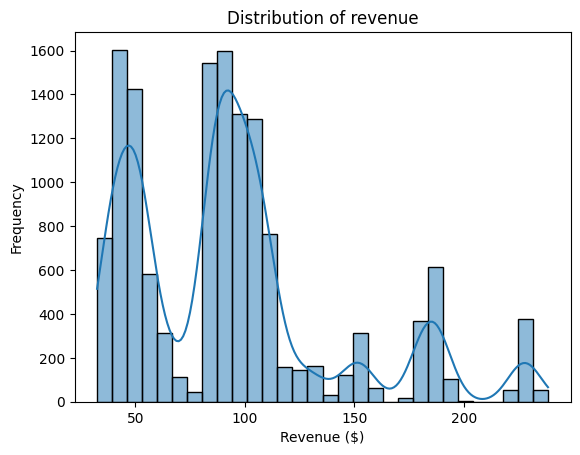

In [11]:
sns.histplot(df['revenue'], kde=True, bins=30)
plt.title('Distribution of revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.show()

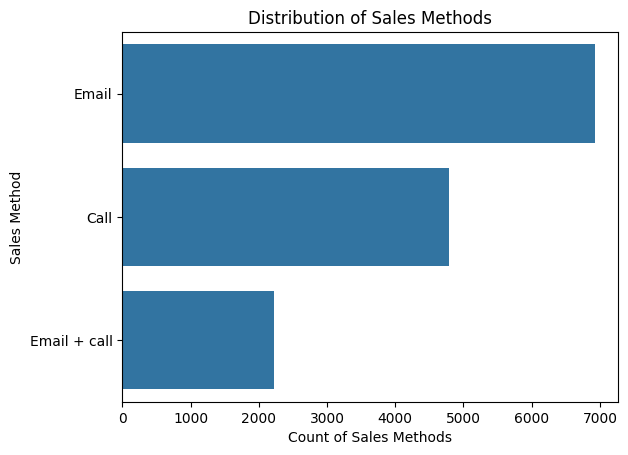

In [12]:
sns.countplot(data=df, y='sales_method', order=df['sales_method'].value_counts().index)
plt.title('Distribution of Sales Methods')
plt.xlabel('Count of Sales Methods')
plt.ylabel('Sales Method')
plt.show()

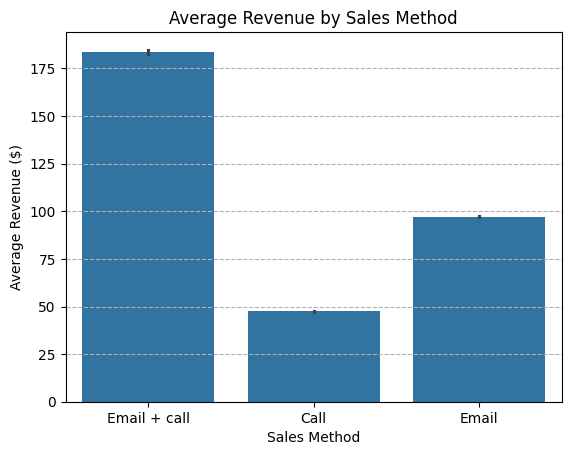

In [13]:
sns.barplot(data=df, x='sales_method', y='revenue')
plt.title('Average Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue ($)')
plt.grid(axis='y', linestyle='--')
plt.show()

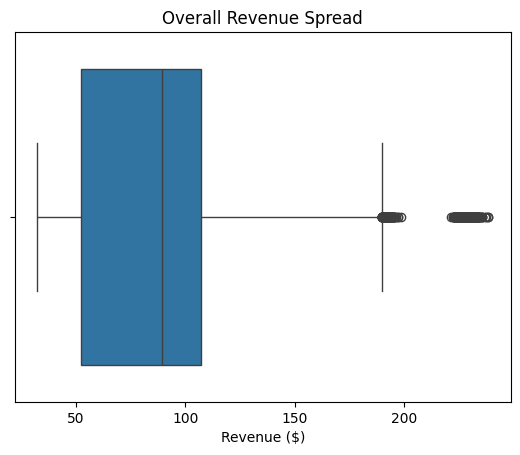

In [14]:
sns.boxplot(x=df['revenue'])
plt.title('Overall Revenue Spread')
plt.xlabel('Revenue ($)')
plt.show()

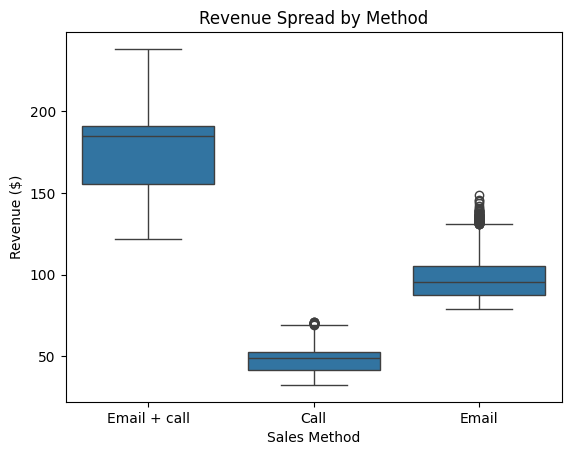

In [15]:
sns.boxplot(data=df, x='sales_method', y='revenue')
plt.title('Revenue Spread by Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue ($)')
plt.show()

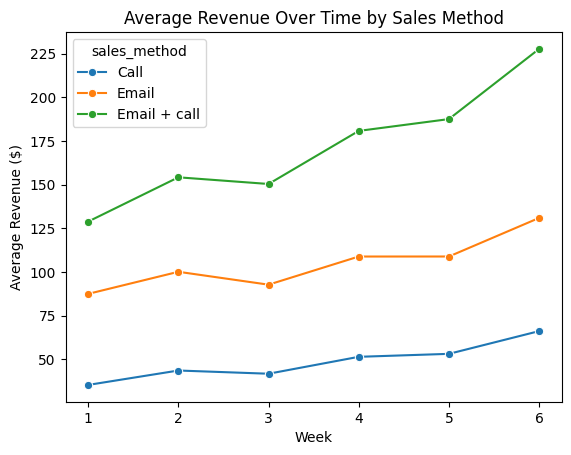

In [16]:
revenue_over_time= df.groupby(['week','sales_method'])['revenue'].mean().reset_index()
sns.lineplot(data=revenue_over_time, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Average Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue ($)')
plt.xticks(df['week'].unique())
plt.show()

In [17]:
sales_method_unique_cust = df.groupby('sales_method')['customer_id'].nunique()
print(sales_method_unique_cust)

sales_method
Call            4781
Email           6922
Email + call    2223
Name: customer_id, dtype: int64


In [18]:
df['revenue'].describe()

,revenue
count,13926.000000
mean,93.934943
std,47.435312
min,32.540000
25%,52.470000
50%,89.500000
75%,107.327500
max,238.320000


Metric for the business to monitor

In [19]:
avg_revenue_by_method = df.groupby('sales_method')['revenue'].mean().reset_index()
print(avg_revenue_by_method)

   sales_method     revenue
0          Call   47.597467
1         Email   97.127684
2  Email + call  183.651233


In [20]:
initial_metric_value = avg_revenue_by_method.loc[2]
print(initial_metric_value)

sales_method    Email + call
revenue           183.651233
Name: 2, dtype: object
